In [1]:
# 데이터 가공 및 시각화를 위한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from datetime import datetime

C:\Users\User\anaconda3\envs\Air_pred\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\envs\Air_pred\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\User\anaconda3\envs\Air_pred\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# 경고 메세지 off
import warnings

warnings.filterwarnings(action='ignore')

## 원본 Data에서 1차로 결측치가 30% 이하인 Data를 필터링하여 Load

In [3]:
# 원 데이터의 data sample in
indata_list =['ICL1L2000011',
'ICL1L2000017', 'ICL1L2000064', 'ICL1L2000065', 'ICL1L2000234', 'ICL1L2000235', 'ICL1L2000236', 'ICL1L2000237', 'ICL1L2000238', 'ICL1L2000239', 'ICL1L2000240', 'ICL1L2000241', 'ICL1L2000242', 'ICL1L2000244', 'ICL1L2000245', 'ICL1L2000246', 'ICL1L2000247', 'ICL1L2000248', 'ICL1L2000249', 'ICL1L2000252', 'ICL1L2000253', 'ICL1L2000254', 'ICL1L2000255', 'ICL1L2000257', 'ICL1L2000258', 'ICL1L2000259', 'ICL1L2000260', 'ICL1L2000262', 'ICL1L2000263', 'ICL1L2000265', 'ICL1L2000266', 'ICL1L2000267', 'ICL1L2000268', 'ICL1L2000269', 'ICL1L2000271', 'ICL1L2000272', 'ICL1L2000274', 'ICL1L2000275', 'ICL1L2000276', 'ICL1L2000277', 'ICL1L2000278', 'ICL1L2000279', 'ICL1L2000280', 'ICL1L2000281', 'ICL1L2000283', 'ICW0W2000011', 'ICW0W2000012', 'ICW0W2000013', 'ICW0W2000014', 'ICW0W2000015', 'ICW0W2000016', 'ICW0W2000018', 'ICW0W2000019', 'ICW0W2000020', 'ICW0W2000022', 'ICW0W2000023', 'ICW0W2000024', 'ICW0W2000025', 'ICW0W2000031', 'ICW0W2000032', 'ICW0W2000033', 'ICW0W2000034', 'ICW0W2000087', 'ICW0W2000088', 'ICW0W2000089', 'ICW0W2000094', 'ICW0W2000095', 'ICW0W2000096', 'ICW0W2000097', 'ICW0W2000098', 'ICW0W2000099', 'ICW0W2000100', 'ICW0W2000101', 'ICW0W2000108', 'ICW0W2000116', 'ICW0W2000128', 'ICW0W2000129', 'ICW0W2000248', 'ICW0W2000251', 'ICW0W2000279', 'ICW0W2000287', 'ICW0W2000396', 'ICW0W2000613', 'ICW0W2000641', 'ICW0W2000647', 'ICW0W2000648', 'ICW0W2000649', 'ICW0W2000650', 'ICW0W2000651', 'ICW0W2000726', 'ICW0W2000727', 'ICW0W2000728', 'ICW0W2000760', 'ICW0W2000781', 'ICW0W2000783', 'ICW0W2000784', 'ICW0W2000786', 'ICW0W2000788', 'ICW0W2000789', 'ICW0W2000790', 'ICW0W2000792', 'ICW0W2000793', 'ICW0W2000794', 'ICW0W2000795', 'ICW0W2000796', 'ICW0W2000798', 'ICW0W2000799', 'ICW0W2000802', 'ICW0W2000805', 'ICW0W2000806', 'ICW0W2000809', 'ICW0W2000810', 'ICW0W2000812', 'ICW0W2000815', 'ICW0W2000816', 'ICW0W2000821', 'ICW0W2000822', 'ICW0W2000823', 'ICW0W2000826', 'ICW0W2000827', 'ICW0W2000828', 'ICW0W2000832', 'ICW0W2000833', 'ICW0W2000836', 'ICW0W2000837', 'ICW0W2000839', 'ICW0W2000840', 'ICW0W2000841', 'ICW0W2000844', 'ICW0W2000847', 'ICW0W2000850', 'ICW0W2001036', 'ICW0W2001037', 'ICW0W2001451', 'ICW0W2001467', 'ICW0W2001470', 'ICW0W2001472', 'ICW0W2001474', 'ICW0W2100150', 'ICW0W2100152', 'ICW0W2100272', 'ICW0W2100273', 'ICW0W2100277', 'ICW0W2100278', 'IS70W2000822', 'IS70W2000824', 'IS70W2000851', 'IS70W2000852', 'IS70W2000853', 'IS70W2000854', 'IS70W2000855', 'IS70W2000856', 'IS70W2000858', 'IT2WW1900379']

## Data를 하나의 Dataframe으로 Join

In [6]:
import os
address = './Dataset'
df_test = pd.read_csv(os.path.join(address,'df_pm10_0811.csv'),encoding='cp949')

In [7]:
print(df_test.count())

Unnamed: 0    105666748
in_serial     105666748
in_id         105666748
time          105666748
in_pm10        65582904
dtype: int64


In [8]:
df_pm10 = df_test[['in_serial', 'in_id', 'time', 'in_pm10']]

In [9]:
len(df_pm10)

105666748

In [10]:
# df_pm10_0811.csv 154개 Dataset의  in_pm10 컬럼만 추출
address = './Dataset'
df_pm10.to_csv(os.path.join(address,'df_pm10_0811.csv'), encoding="cp949")

In [12]:
# 가공을 끝낸'df_pm10_drop' data set 불러오기
address = './Dataset'
df_pm10_drop = pd.read_csv(os.path.join(address,'df_pm10_0811.csv'),encoding='cp949')

## pm10이 존재하지 않는 행을 전부 삭제 (df_pm10_drop)

In [13]:
df_pm10_drop = df_pm10.dropna(axis=0)

In [14]:
len(df_pm10_drop)

65582904

In [15]:
df_pm10_drop

,in_serial,in_id,time,in_pm10
0,경로당,ICL1L2000234,2021-02-04 10:33:00+00:00,20.0
1,경로당,ICL1L2000234,2021-02-04 10:34:00+00:00,19.0
2,경로당,ICL1L2000234,2021-02-04 10:35:00+00:00,18.0
3,경로당,ICL1L2000234,2021-02-04 10:36:00+00:00,17.0
4,경로당,ICL1L2000234,2021-02-04 10:37:00+00:00,18.0
...,...,...,...,...
105319368,초등학교,ICW0W2000034,2021-08-29 23:55:00+00:00,29.0
105319369,초등학교,ICW0W2000034,2021-08-29 23:56:00+00:00,30.0
105319370,초등학교,ICW0W2000034,2021-08-29 23:57:00+00:00,31.0
105319371,초등학교,ICW0W2000034,2021-08-29 23:58:00+00:00,33.0


In [16]:
# time에서 연도와 일자만 선택하여 time_day를 생성
df_pm10_drop['time'] = df_pm10_drop['time'].apply(lambda x : x.replace('+00:00','') )
df_pm10_drop['time_day']= df_pm10_drop['time'].apply(lambda x : x[:10])

In [17]:
df_pm10_drop

,in_serial,in_id,time,in_pm10,time_day
0,경로당,ICL1L2000234,2021-02-04 10:33:00,20.0,2021-02-04
1,경로당,ICL1L2000234,2021-02-04 10:34:00,19.0,2021-02-04
2,경로당,ICL1L2000234,2021-02-04 10:35:00,18.0,2021-02-04
3,경로당,ICL1L2000234,2021-02-04 10:36:00,17.0,2021-02-04
4,경로당,ICL1L2000234,2021-02-04 10:37:00,18.0,2021-02-04
...,...,...,...,...,...
105319368,초등학교,ICW0W2000034,2021-08-29 23:55:00,29.0,2021-08-29
105319369,초등학교,ICW0W2000034,2021-08-29 23:56:00,30.0,2021-08-29
105319370,초등학교,ICW0W2000034,2021-08-29 23:57:00,31.0,2021-08-29
105319371,초등학교,ICW0W2000034,2021-08-29 23:58:00,33.0,2021-08-29


In [18]:
df_pm10_drop['in_id'].count()

65582904

In [19]:
# 3000 초과의 값을 가진 pm10 이상치 삭제
index1 = df_pm10_drop[df_pm10_drop['in_pm10'] > 3000].index
print(index1)
print(len(index1))

Int64Index([ 13017047,  13017048,  13017049,  13017050,  13017051,  13017052,
             13017053,  14720890,  14720891,  14720892,
            ...
            101131591, 101131592, 101131593, 102804710, 102804711, 102804712,
            102804713, 102804714, 102804715, 102804716],
           dtype='int64', length=18013)
18013


In [20]:
df_pm10_drop02 = df_pm10_drop.drop(index1)

In [21]:
# df_pm10_drop_0811.csv 154개 Dataset의 in_pm10 컬럼에서 결측값 제외하고 추출
address = './Dataset'
df_pm10_drop02.to_csv(os.path.join(address,'df_pm10_drop_1110.csv'), encoding="cp949",index=False)

## id별로 row값 집계

In [22]:
df_pm10_drop02.groupby('in_id').count()

,in_serial,time,in_pm10,time_day
in_id,,,,
ICL1L2000011,613456,613456,613456,613456
ICL1L2000017,621167,621167,621167,621167
ICL1L2000064,338934,338934,338934,338934
ICL1L2000065,331663,331663,331663,331663
ICL1L2000234,150532,150532,150532,150532
...,...,...,...,...
IS70W2000854,541995,541995,541995,541995
IS70W2000855,471570,471570,471570,471570
IS70W2000856,548489,548489,548489,548489


## in별 Data의 timeindex 시작값과 끝값을 추출하여 통계

In [23]:
indata_cd_list=[] # indata_cd list
indata_cd_start=[] # indata_cd의 시작 시간 list
indata_cd_end=[] # indata_cd의 끝 시간 list
indata_len=[] # indata_cd 길이 저장

for indata_cd in indata_list:
    print(indata_cd)
    indata_cd_list.append(indata_cd)

    print(df_pm10_drop02[df_pm10_drop02['in_id'] == indata_cd].iloc[2,2])
    print(df_pm10_drop02[df_pm10_drop02['in_id'] == indata_cd].iloc[-1,2])
    data_len = len(df_pm10_drop02[df_pm10_drop02['in_id'] == indata_cd])

    indata_len.append(data_len)
    indata_cd_start.append(df_pm10_drop02[df_pm10_drop02['in_id'] == indata_cd].iloc[2,2])
    indata_cd_end.append(df_pm10_drop02[df_pm10_drop02['in_id'] == indata_cd].iloc[-1,2])


dict = {'indata_cd': indata_cd_list, 'indata_cd_start': indata_cd_start, 'indata_cd_end': indata_cd_end, 'indata_len': indata_len }
df_time = pd.DataFrame(dict)

ICL1L2000011
2020-06-18 08:51:00
2021-08-29 23:59:00
ICL1L2000017
2020-06-18 08:51:00
2021-08-29 23:59:00
ICL1L2000064
2020-10-23 11:18:00
2021-08-29 23:59:00
ICL1L2000065
2020-10-23 16:50:00
2021-08-29 23:59:00
ICL1L2000234
2021-02-04 10:35:00
2021-05-20 12:50:00
ICL1L2000235
2021-02-04 09:16:00
2021-08-31 23:58:00
ICL1L2000236
2021-02-03 17:20:00
2021-08-31 23:58:00
ICL1L2000237
2021-02-03 18:19:00
2021-08-31 23:59:00
ICL1L2000238
2021-01-25 14:42:00
2021-08-31 23:59:00
ICL1L2000239
2021-01-25 14:55:00
2021-08-31 23:59:00
ICL1L2000240
2021-02-04 11:01:00
2021-08-31 23:59:00
ICL1L2000241
2021-02-04 10:00:00
2021-08-31 23:59:00
ICL1L2000242
2021-02-04 10:18:00
2021-08-31 23:59:00
ICL1L2000244
1970-01-01 00:04:00
2021-07-25 01:33:00
ICL1L2000245
2021-02-04 14:45:00
2021-08-31 23:59:00
ICL1L2000246
2021-02-04 11:42:00
2021-08-31 23:59:00
ICL1L2000247
2021-02-04 12:22:00
2021-07-07 15:43:00
ICL1L2000248
2021-02-04 12:04:00
2021-08-31 23:59:00
ICL1L2000249
2021-02-04 14:57:00
2021-08-31 23

In [24]:
# indata_cd의 기간을 계산하기 위해 시간 컬럼 형변환
df_time['indata_cd_start'] = df_time['indata_cd_start'].apply(lambda x : x.replace('+00:00','') )
df_time['indata_cd_end'] = df_time['indata_cd_end'].apply(lambda x : x.replace('+00:00','') )
df_time['indata_cd_start']= df_time['indata_cd_start'].apply(lambda _ : datetime.strptime(_,'%Y-%m-%d %H:%M:%S'))
df_time['indata_cd_end']= df_time['indata_cd_end'].apply(lambda _ : datetime.strptime(_,'%Y-%m-%d %H:%M:%S'))

In [25]:
# indata_cd의 기간 연산
df_time['start-end'] = df_time['indata_cd_end']-df_time['indata_cd_start']
df_time['start-end_m'] = df_time['start-end'].astype('timedelta64[m]')

In [26]:
df_time

,indata_cd,indata_cd_start,indata_cd_end,indata_len,start-end,start-end_m
0,ICL1L2000011,2020-06-18 08:51:00,2021-08-29 23:59:00,613456,437 days 15:08:00,630188.0
1,ICL1L2000017,2020-06-18 08:51:00,2021-08-29 23:59:00,621167,437 days 15:08:00,630188.0
2,ICL1L2000064,2020-10-23 11:18:00,2021-08-29 23:59:00,338934,310 days 12:41:00,447161.0
3,ICL1L2000065,2020-10-23 16:50:00,2021-08-29 23:59:00,331663,310 days 07:09:00,446829.0
4,ICL1L2000234,2021-02-04 10:35:00,2021-05-20 12:50:00,150532,105 days 02:15:00,151335.0
...,...,...,...,...,...,...
149,IS70W2000854,2021-04-09 17:27:00,2022-04-30 23:59:00,541995,386 days 06:32:00,556232.0
150,IS70W2000855,2021-04-09 17:28:00,2022-03-08 19:51:00,471570,333 days 02:23:00,479663.0
151,IS70W2000856,2021-04-09 17:28:00,2022-04-30 23:59:00,548489,386 days 06:31:00,556231.0
152,IS70W2000858,2021-04-09 17:29:00,2022-04-30 23:59:00,538732,386 days 06:30:00,556230.0


In [28]:
address = './Dataset/Dataset_info'
df_time.to_csv(os.path.join(address,'df_time_drop.csv'), encoding="cp949")

# id별 Data를 일별로 집계하였을 때 결측치 계산을 진행

In [29]:
strat_time= df_pm10_drop02[df_pm10_drop02['in_id'] == indata_cd].iloc[2,2]
df_pm10_drop02[df_pm10_drop02['in_id'] == indata_cd].iloc[-1,2]

'2020-07-11 01:42:00'

In [30]:
df_ICL1L2000234 = df_pm10_drop02[df_pm10_drop02['in_id'] == 'ICL1L2000234']
df_ICL1L2000234['time_day']= df_ICL1L2000234['time'].apply(lambda x : x[:10])
df_day_cnt = df_ICL1L2000234[['time_day','in_pm10']].groupby('time_day').count() # 일자별 값이 존재하는 row를 count
df_day_cnt.head()

,in_pm10
time_day,
2021-02-04,798
2021-02-05,1436
2021-02-06,1438
2021-02-07,1438
2021-02-08,1432


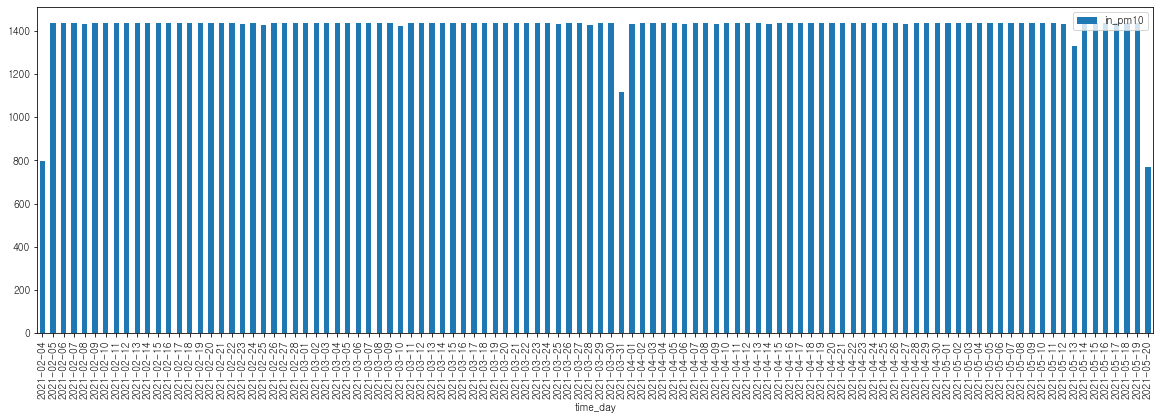

In [31]:
# count 값 시각화
fig, ax = plt.subplots(figsize=(20, 6))
df_day_cnt.plot.bar(y=['in_pm10'], use_index=True, ax=ax)
plt.show()

In [32]:
# 하루 1440분의 70%보다 값이 적을 경우 False로 표시
df_day_cnt['time_day_TF']= df_day_cnt['in_pm10'].apply(lambda x: x/1440 > 0.7 )
df_day_cnt

,in_pm10,time_day_TF
time_day,,
2021-02-04,798,False
2021-02-05,1436,True
2021-02-06,1438,True
2021-02-07,1438,True
2021-02-08,1432,True
...,...,...
2021-05-16,1437,True
2021-05-17,1436,True
2021-05-18,1438,True


In [33]:
df_day_cnt = df_day_cnt.reset_index()

In [34]:
dict_test = {'indata_cd': 'ICL1L2000234','time_day': df_day_cnt['time_day'].values, 'df_day_cnt': df_day_cnt['in_pm10'].values, 'time_day_TF': df_day_cnt['time_day_TF'].values }
test01= pd.DataFrame(dict_test)

In [35]:
test01

,indata_cd,time_day,df_day_cnt,time_day_TF
0,ICL1L2000234,2021-02-04,798,False
1,ICL1L2000234,2021-02-05,1436,True
2,ICL1L2000234,2021-02-06,1438,True
3,ICL1L2000234,2021-02-07,1438,True
4,ICL1L2000234,2021-02-08,1432,True
...,...,...,...,...
101,ICL1L2000234,2021-05-16,1437,True
102,ICL1L2000234,2021-05-17,1436,True
103,ICL1L2000234,2021-05-18,1438,True
104,ICL1L2000234,2021-05-19,1438,True


In [36]:
"""정상값이 70%이상만 존재하는 30일 기간을 True로 표기 저장함"""
df_pm10_day2 = pd.DataFrame()
for indata_cd in indata_list:
    print(indata_cd)
    indata_cd_list.append(indata_cd)

    # in_id별로 group 하여 day 별로 존재하는 row count 하기
    df_sample= df_pm10_drop02[df_pm10_drop02['in_id'] == indata_cd]
    df_sample['time_day']= df_sample['time'].apply(lambda x : x[:10])
    df_day_cnt = df_sample[['time_day','in_pm10']].groupby('time_day').count()

    # count된 row의 정상값이 70%이상 존재 할 경우 True로 표기
    df_day_cnt['time_day_TF']= df_day_cnt['in_pm10'].apply(lambda x: x/1440 >= 0.7 )
    df_day_cnt = df_day_cnt.reset_index()

    # in_id와 row count 값과 결측치 필터결과 값을 dataframe으로 저장
    dict = {'indata_cd': indata_cd,'time_day': df_day_cnt['time_day'].values, 'df_day_cnt': df_day_cnt['in_pm10'].values, 'time_day_TF': df_day_cnt['time_day_TF'].values }
    test01= pd.DataFrame(dict)
    df_pm10_day2 = pd.concat([df_pm10_day2,test01], ignore_index=True)


ICL1L2000011
ICL1L2000017
ICL1L2000064
ICL1L2000065
ICL1L2000234
ICL1L2000235
ICL1L2000236
ICL1L2000237
ICL1L2000238
ICL1L2000239
ICL1L2000240
ICL1L2000241
ICL1L2000242
ICL1L2000244
ICL1L2000245
ICL1L2000246
ICL1L2000247
ICL1L2000248
ICL1L2000249
ICL1L2000252
ICL1L2000253
ICL1L2000254
ICL1L2000255
ICL1L2000257
ICL1L2000258
ICL1L2000259
ICL1L2000260
ICL1L2000262
ICL1L2000263
ICL1L2000265
ICL1L2000266
ICL1L2000267
ICL1L2000268
ICL1L2000269
ICL1L2000271
ICL1L2000272
ICL1L2000274
ICL1L2000275
ICL1L2000276
ICL1L2000277
ICL1L2000278
ICL1L2000279
ICL1L2000280
ICL1L2000281
ICL1L2000283
ICW0W2000011
ICW0W2000012
ICW0W2000013
ICW0W2000014
ICW0W2000015
ICW0W2000016
ICW0W2000018
ICW0W2000019
ICW0W2000020
ICW0W2000022
ICW0W2000023
ICW0W2000024
ICW0W2000025
ICW0W2000031
ICW0W2000032
ICW0W2000033
ICW0W2000034
ICW0W2000087
ICW0W2000088
ICW0W2000089
ICW0W2000094
ICW0W2000095
ICW0W2000096
ICW0W2000097
ICW0W2000098
ICW0W2000099
ICW0W2000100
ICW0W2000101
ICW0W2000108
ICW0W2000116
ICW0W2000128
ICW0W2000129

In [37]:
df_pm10_day2.head()

,indata_cd,time_day,df_day_cnt,time_day_TF
0,ICL1L2000011,2020-06-18,908,False
1,ICL1L2000011,2020-06-19,808,False
2,ICL1L2000011,2020-06-22,6,False
3,ICL1L2000011,2020-06-26,538,False
4,ICL1L2000011,2020-06-27,1438,True


In [38]:
# 일별 결측값을 계산한 dataframe 저장
address = './Dataset/Dataset_info'
df_pm10_day2.to_csv(os.path.join(address,'df_pm10_day2.csv'), encoding="cp949")

In [39]:
df_sample= df_pm10_day2[df_pm10_day2['indata_cd'] == 'ICW0W2100278']

In [40]:
df_sample

,indata_cd,time_day,df_day_cnt,time_day_TF
43373,ICW0W2100278,2021-04-29,166,False
43374,ICW0W2100278,2021-05-20,552,False
43375,ICW0W2100278,2021-05-21,1439,True
43376,ICW0W2100278,2021-05-22,1440,True
43377,ICW0W2100278,2021-05-23,1440,True
...,...,...,...,...
43438,ICW0W2100278,2021-08-25,1440,True
43439,ICW0W2100278,2021-08-26,1440,True
43440,ICW0W2100278,2021-08-27,1440,True
43441,ICW0W2100278,2021-08-28,1376,True


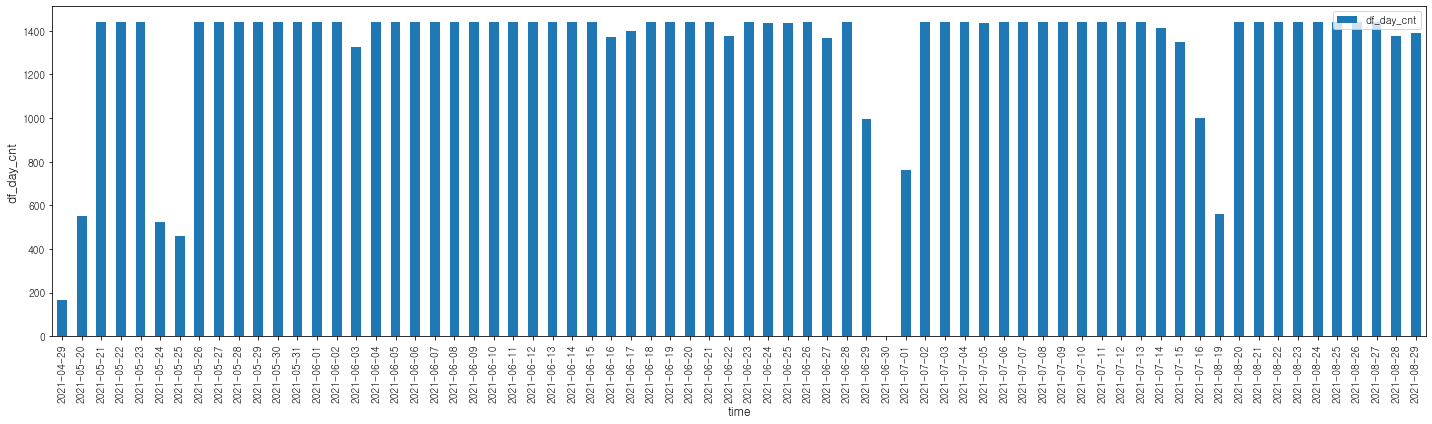

In [41]:
fig, ax = plt.subplots(figsize=(20, 6))
df_sample.plot.bar(x='time_day', y=['df_day_cnt'], use_index=True, ax=ax)
plt.ylabel("df_day_cnt", fontsize="large")
plt.xlabel("time", fontsize="large")
plt.tight_layout()
plt.savefig(address + '/ICW0W2100278_day_cnt.png')
plt.show()

## Data 한달 단위로 추출하기

In [42]:
is_indata_cd = df_pm10_day2['indata_cd']=='IS70W2000824'
is_TF =  df_pm10_day2['time_day_TF']==True
sample = df_pm10_day2[is_indata_cd & is_TF]

In [43]:
sample['time_day_D']= sample['time_day'].apply(lambda _ : np.datetime64(_))

In [44]:
sample

,indata_cd,time_day,df_day_cnt,time_day_TF,time_day_D
43829,IS70W2000824,2021-04-23,1433,True,2021-04-23
43830,IS70W2000824,2021-04-24,1437,True,2021-04-24
43831,IS70W2000824,2021-04-25,1346,True,2021-04-25
43832,IS70W2000824,2021-04-26,1283,True,2021-04-26
43833,IS70W2000824,2021-04-27,1232,True,2021-04-27
...,...,...,...,...,...
44195,IS70W2000824,2022-04-26,1170,True,2022-04-26
44196,IS70W2000824,2022-04-27,1286,True,2022-04-27
44197,IS70W2000824,2022-04-28,1276,True,2022-04-28
44198,IS70W2000824,2022-04-29,1330,True,2022-04-29


In [45]:
test02= pd.DataFrame() # 30일 기간의 시작과 끝 시점 정보를 담을 dataframe
indata_cd_list=[] # indata_cd list
strat_time=[] # 시작시점
end_time=[] # 끝 시점

for indata_cd in indata_list:
    print(indata_cd)
    indata_cd_list.append(indata_cd)
    is_indata_cd = df_pm10_day2['indata_cd'] == indata_cd
    is_TF =  df_pm10_day2['time_day_TF'] == True
    sample = df_pm10_day2[is_indata_cd & is_TF]

    if len(sample) >30:
        if np.datetime64(sample.iloc[32,1])-np.datetime64(sample.iloc[2,1]) == 30:
            print(np.datetime64(sample.iloc[32,1])-np.datetime64(sample.iloc[2,1]))
            strat_time.append(sample.iloc[2,1])
            end_time.append(sample.iloc[32,1])

        elif np.datetime64(sample.iloc[33,1])-np.datetime64(sample.iloc[3,1]) == 30:
            print(np.datetime64(sample.iloc[33,1])-np.datetime64(sample.iloc[3,1]))
            strat_time.append(sample.iloc[3,1])
            end_time.append(sample.iloc[33,1])

        elif np.datetime64(sample.iloc[42,1])-np.datetime64(sample.iloc[12,1]) == 30:
            print(np.datetime64(sample.iloc[42,1])-np.datetime64(sample.iloc[12,1]))
            strat_time.append(sample.iloc[12,1])
            end_time.append(sample.iloc[42,1])

        elif np.datetime64(sample.iloc[52,1])-np.datetime64(sample.iloc[22,1]) == 30:
            print(np.datetime64(sample.iloc[52,1])-np.datetime64(sample.iloc[22,1]))
            strat_time.append(sample.iloc[22,1])
            end_time.append(sample.iloc[52,1])

        elif np.datetime64(sample.iloc[133,1])-np.datetime64(sample.iloc[103,1]) == 30:
            print(np.datetime64(sample.iloc[133,1])-np.datetime64(sample.iloc[103,1]))
            strat_time.append(sample.iloc[103,1])
            end_time.append(sample.iloc[133,1])

        elif np.datetime64(sample.iloc[-1,1])-np.datetime64(sample.iloc[-30,1]) == 30:
            print(np.datetime64(sample.iloc[-1,1])-np.datetime64(sample.iloc[-30,1]))
            strat_time.append(sample.iloc[-30,1])
            end_time.append(sample.iloc[-1,1])

        elif np.datetime64(sample.iloc[-10,1])-np.datetime64(sample.iloc[-40,1]) == 30:
            print(np.datetime64(sample.iloc[-10,1])-np.datetime64(sample.iloc[-40,1]))
            strat_time.append(sample.iloc[-40,1])
            end_time.append(sample.iloc[-10,1])

        else:
            strat_time.append('false')
            end_time.append('false')
            print('false') # 결측값이 30%가 넘지 않는 30일 기간이 없는 indata_cd 는 "false"으로 지정
    else:
        strat_time.append('길이부족') # 길이가 부족한 indata_cd는 "길이 부족"으로 지정
        end_time.append('길이부족')
        print("길이부족")



ICL1L2000011
30 days
ICL1L2000017
30 days
ICL1L2000064
30 days
ICL1L2000065
30 days
ICL1L2000234
30 days
ICL1L2000235
30 days
ICL1L2000236
30 days
ICL1L2000237
30 days
ICL1L2000238
30 days
ICL1L2000239
30 days
ICL1L2000240
30 days
ICL1L2000241
30 days
ICL1L2000242
30 days
ICL1L2000244
30 days
ICL1L2000245
30 days
ICL1L2000246
30 days
ICL1L2000247
30 days
ICL1L2000248
30 days
ICL1L2000249
30 days
ICL1L2000252
30 days
ICL1L2000253
30 days
ICL1L2000254
30 days
ICL1L2000255
30 days
ICL1L2000257
30 days
ICL1L2000258
30 days
ICL1L2000259
30 days
ICL1L2000260
30 days
ICL1L2000262
30 days
ICL1L2000263
30 days
ICL1L2000265
30 days
ICL1L2000266
30 days
ICL1L2000267
30 days
ICL1L2000268
30 days
ICL1L2000269
30 days
ICL1L2000271
30 days
ICL1L2000272
30 days
ICL1L2000274
30 days
ICL1L2000275
30 days
ICL1L2000276
30 days
ICL1L2000277
30 days
ICL1L2000278
30 days
ICL1L2000279
30 days
ICL1L2000280
30 days
ICL1L2000281
30 days
ICL1L2000283
30 days
ICW0W2000011
30 days
ICW0W2000012
30 days
ICW0W2000013


In [46]:
dict = {'indata_cd': indata_cd_list,'start_time': strat_time, 'end_time': end_time}
in_data_resample= pd.DataFrame(dict)

In [47]:
in_data_resample.tail(10)

,indata_cd,start_time,end_time
144,IS70W2000822,2022-03-22,2022-04-21
145,IS70W2000824,false,false
146,IS70W2000851,2021-04-17,2021-05-17
147,IS70W2000852,2021-04-17,2021-05-17
148,IS70W2000853,2021-04-17,2021-05-17
149,IS70W2000854,2021-04-20,2021-05-20
150,IS70W2000855,2021-04-17,2021-05-17
151,IS70W2000856,2021-04-17,2021-05-17
152,IS70W2000858,2021-04-23,2021-05-23
153,IT2WW1900379,길이부족,길이부족


In [48]:
in_data_resample[in_data_resample['start_time']=='false']

,indata_cd,start_time,end_time
145,IS70W2000824,false,false


In [49]:
df_sample01= df_pm10_day2[df_pm10_day2['indata_cd'] == 'IS70W2000824']

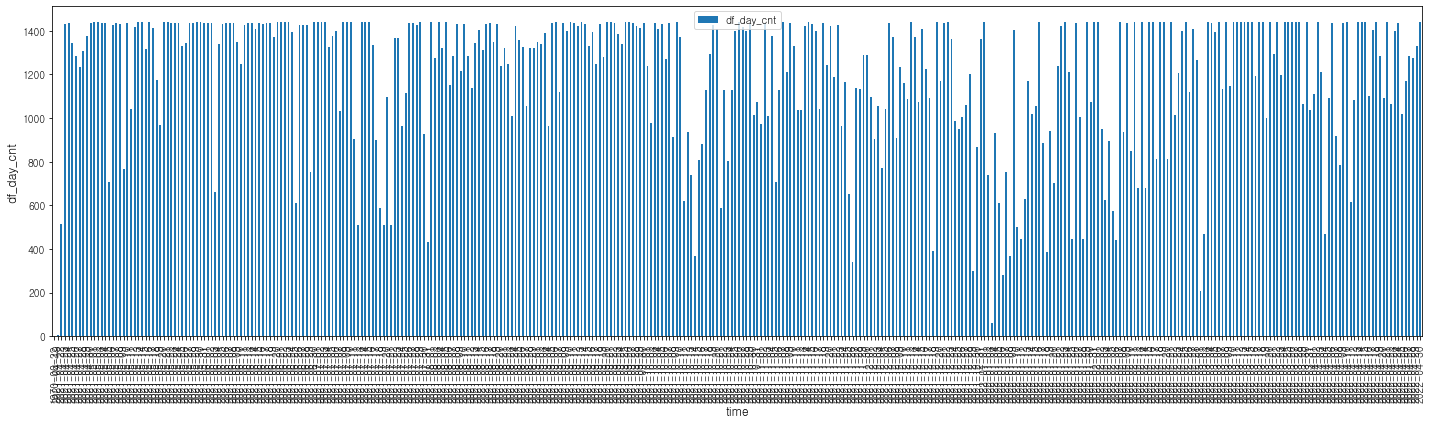

In [50]:
fig, ax = plt.subplots(figsize=(20, 6))
df_sample01.plot.bar(x='time_day', y=['df_day_cnt'], use_index=True, ax=ax)
plt.ylabel("df_day_cnt", fontsize="large")
plt.xlabel("time", fontsize="large")
plt.tight_layout()
#plt.savefig(address + '/ICW0W2100278_day_cnt.png')
plt.show()

In [51]:
# 30일 기간을 선정한 dataframe을 csv로 저장함
address = './Dataset/Dataset_info'
in_data_resample.to_csv(os.path.join(address,'in_data_resample.csv'), encoding="cp949", index=False)